# WEEK 1

In [163]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv(r"C:\Users\kasub\Desktop\Excelerate\SLU Opportunity Wise Data-1710158595043 - SLU Opportunity Wise Data-1710158595043.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Learner SignUp DateTime  8558 non-null   object
 1   Opportunity Id           8558 non-null   object
 2   Opportunity Name         8558 non-null   object
 3   Opportunity Category     8558 non-null   object
 4   Opportunity End Date     8558 non-null   object
 5   First Name               8558 non-null   object
 6   Date of Birth            8558 non-null   object
 7   Gender                   8558 non-null   object
 8   Country                  8558 non-null   object
 9   Institution Name         8553 non-null   object
 10  Current/Intended Major   8553 non-null   object
 11  Entry created at         8558 non-null   object
 12  Status Description       8558 non-null   object
 13  Status Code              8558 non-null   int64 
 14  Apply Date               8558 non-null  

## Standardize column names

In [166]:
df.rename(columns={
    "Date of Birth": "DOB",
    "Learner SignUp DateTime": "SignUp_DateTime",
    "Current/Intended Major": "Major"
}, inplace=True)
df

,SignUp_DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,DOB,Gender,Country,Institution Name,Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,01/12/2001,Female,Pakistan,Nwihs,Radiology,03/11/2024 12:01:41,Started,1080,06/14/2023 12:36:09,11/03/2022 18:30:39
1,05/01/2023 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,08/16/2000,Female,India,SAINT LOUIS,Information Systems,03/11/2024 12:01:41,Started,1080,05/01/2023 06:08:21,11/03/2022 18:30:39
2,04/09/2023 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,01/27/2002,Male,United States,Illinois Institute of Technology,Computer Science,03/11/2024 12:01:41,Started,1080,05/11/2023 1085640:21:29,11/03/2022 18:30:39
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,11/01/1999,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:01:41,Team Allocated,1070,10/09/2023 22:02:42,11/03/2022 18:30:39
4,01/06/2023 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,04/19/2000,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:01:41,Started,1080,01/06/2023 15:40:10,11/03/2022 18:30:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,03/05/2024 16:39:21,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Selam,10/14/2006,Female,Ethiopia,Lideta Catholic Cathedral School,Computer Science,03/11/2024 12:03:14,Team Allocated,1070,03/05/2024 17:10:41,03/08/2024 14:00:00
8554,03/06/2024 15:58:47,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Gowri Sailesh,05/18/1999,Male,United States,SAINT LOUIS UNIVERSITY,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,03/06/2024 18:22:11,03/08/2024 14:00:00
8555,02/29/2024 15:02:31,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Abiola,03/16/1999,Male,Nigeria,Tai Solarin university of Education,Political Science,03/11/2024 12:03:14,Team Allocated,1070,02/29/2024 15:10:06,03/08/2024 14:00:00
8556,12/23/2023 03:53:12,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,venumadhavi,06/05/1997,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,02/27/2024 06:48:47,03/08/2024 14:00:00


## Convert date columns

In [169]:
date_cols = ["DOB", "SignUp_DateTime", "Apply Date", "Opportunity Start Date", "Opportunity End Date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

## Checking for missing values

In [172]:
print("\nMissing Values by Column:\n", df.isnull().sum())


Missing Values by Column:
 SignUp_DateTime            295
Opportunity Id               0
Opportunity Name             0
Opportunity Category         0
Opportunity End Date      1262
First Name                   0
DOB                          0
Gender                       0
Country                      0
Institution Name             5
Major                        5
Entry created at             0
Status Description           0
Status Code                  0
Apply Date                 307
Opportunity Start Date    4637
dtype: int64


## Handeling missing values

In [175]:
df["Institution Name"].fillna("Unknown", inplace=True)
# === Remove duplicates ===
df.drop_duplicates(inplace=True)

# === Fill Apply Date with SignUp_DateTime if missing ===
df["Apply Date"].fillna(df["SignUp_DateTime"], inplace=True)

# Fill missing SignUp_DateTime using Apply Date where available
df.loc[df["SignUp_DateTime"].isna() & df["Apply Date"].notna(), "SignUp_DateTime"] = df["Apply Date"]

# === Drop rows where both Apply Date and SignUp_DateTime are missing ===
df.dropna(subset=["Apply Date", "SignUp_DateTime"], how="all", inplace=True)

# === Impute Opportunity End Date using median duration ===
df["Opportunity_Duration"] = (df["Opportunity End Date"] - df["Opportunity Start Date"]).dt.days
df["Opportunity End Date"].fillna(df["Opportunity Start Date"] + pd.to_timedelta(df["Opportunity_Duration"].median(), unit='d'), inplace=True)

# Drop rows with missing Opportunity End Date
df = df.dropna(subset=["Opportunity End Date"])

# Optional: Reset index after dropping
df.reset_index(drop=True, inplace=True)

C:\Users\kasub\AppData\Local\Temp\ipykernel_15376\152398425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Institution Name"].fillna("Unknown", inplace=True)
C:\Users\kasub\AppData\Local\Temp\ipykernel_15376\152398425.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [177]:
print("\nMissing Values by Column:\n", df.isnull().sum())


Missing Values by Column:
 SignUp_DateTime              0
Opportunity Id               0
Opportunity Name             0
Opportunity Category         0
Opportunity End Date         0
First Name                   0
DOB                          0
Gender                       0
Country                      0
Institution Name             0
Major                        5
Entry created at             0
Status Description           0
Status Code                  0
Apply Date                   0
Opportunity Start Date    3791
Opportunity_Duration      4235
dtype: int64


## Standardize categorical values

In [180]:
df["Gender"] = df["Gender"].str.strip().str.title()
df["Gender"].replace({"": "Not Provided", "Na": "Not Provided"}, inplace=True)

df["Major"] = df["Major"].astype(str).str.strip()
df["Major"] = df["Major"].apply(lambda x: x if x.isalpha() or ' ' in x else "Other")

C:\Users\kasub\AppData\Local\Temp\ipykernel_15376\2542866479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].str.strip().str.title()
C:\Users\kasub\AppData\Local\Temp\ipykernel_15376\2542866479.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender

In [182]:
df

,SignUp_DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,DOB,Gender,Country,Institution Name,Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Opportunity_Duration
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-01-12,Female,Pakistan,Nwihs,Radiology,03/11/2024 12:01:41,Started,1080,2023-06-14 12:36:09,2022-11-03 18:30:39,604.0
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,SAINT LOUIS,Information Systems,03/11/2024 12:01:41,Started,1080,2023-05-01 06:08:21,2022-11-03 18:30:39,604.0
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute of Technology,Computer Science,03/11/2024 12:01:41,Started,1080,2023-04-09 20:35:08,2022-11-03 18:30:39,604.0
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,1999-11-01,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:01:41,Team Allocated,1070,2023-10-09 22:02:42,2022-11-03 18:30:39,604.0
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:01:41,Started,1080,2023-01-06 15:40:10,2022-11-03 18:30:39,604.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,2024-03-05 16:39:21,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-03-08 11:30:00,Selam,2006-10-14,Female,Ethiopia,Lideta Catholic Cathedral School,Computer Science,03/11/2024 12:03:14,Team Allocated,1070,2024-03-05 17:10:41,2024-03-08 14:00:00,-1.0
7679,2024-03-06 15:58:47,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-03-08 11:30:00,Gowri Sailesh,1999-05-18,Male,United States,SAINT LOUIS UNIVERSITY,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,2024-03-06 18:22:11,2024-03-08 14:00:00,-1.0
7680,2024-02-29 15:02:31,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-03-08 11:30:00,Abiola,1999-03-16,Male,Nigeria,Tai Solarin university of Education,Political Science,03/11/2024 12:03:14,Team Allocated,1070,2024-02-29 15:10:06,2024-03-08 14:00:00,-1.0
7681,2023-12-23 03:53:12,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-03-08 11:30:00,venumadhavi,1997-06-05,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,2024-02-27 06:48:47,2024-03-08 14:00:00,-1.0


## Feature Engineering

In [185]:
# === Add date flags ===
df["Has_Start_Date"] = df["Opportunity Start Date"].notnull().astype(int)
df["Has_End_Date"] = df["Opportunity End Date"].notnull().astype(int)
df["Has_Apply_Date"] = df["Apply Date"].notnull().astype(int)

# === Calculate Age ===
df["Age"] = (df["Opportunity Start Date"] - df["DOB"]).dt.days // 365

# Engagement Lag (days between Apply Date and Start Date)
df["Engagement_Lag"] = (df["Opportunity Start Date"] - df["Apply Date"]).dt.days

# Opportunity Duration (end - start)
df["Opportunity_Duration"] = (df["Opportunity End Date"] - df["Opportunity Start Date"]).dt.days

# Signup Month & Day of Week
df["Signup_Month"] = df["SignUp_DateTime"].dt.month
df["Signup_Weekday"] = df["SignUp_DateTime"].dt.day_name()

# Normalize Age and Opportunity Duration
scaler = MinMaxScaler()
df[["Norm_Age", "Norm_Opportunity_Duration"]] = scaler.fit_transform(df[["Age", "Opportunity_Duration"]])

# Composite Engagement Score
df["Engagement_Score"] = (
    0.4 * df["Norm_Opportunity_Duration"] +
    0.3 * df["Norm_Age"] +
    0.3 * df["Engagement_Lag"].fillna(0)
)

C:\Users\kasub\AppData\Local\Temp\ipykernel_15376\4216470353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Has_Start_Date"] = df["Opportunity Start Date"].notnull().astype(int)
C:\Users\kasub\AppData\Local\Temp\ipykernel_15376\4216470353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Has_End_Date"] = df["Opportunity End Date"].notnull().astype(int)
C:\Users\kasub\AppData\Local\Temp\ipykernel_15376\4216470353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [187]:
print("\nMissing Values by Column:\n", df.isnull().sum())


Missing Values by Column:
 SignUp_DateTime                 0
Opportunity Id                  0
Opportunity Name                0
Opportunity Category            0
Opportunity End Date            0
First Name                      0
DOB                             0
Gender                          0
Country                         0
Institution Name                0
Major                           0
Entry created at                0
Status Description              0
Status Code                     0
Apply Date                      0
Opportunity Start Date       3791
Opportunity_Duration         3791
Has_Start_Date                  0
Has_End_Date                    0
Has_Apply_Date                  0
Age                          3791
Engagement_Lag               3791
Signup_Month                    0
Signup_Weekday                  0
Norm_Age                     3791
Norm_Opportunity_Duration    3791
Engagement_Score             3791
dtype: int64


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7683 entries, 0 to 7682
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SignUp_DateTime            7683 non-null   datetime64[ns]
 1   Opportunity Id             7683 non-null   object        
 2   Opportunity Name           7683 non-null   object        
 3   Opportunity Category       7683 non-null   object        
 4   Opportunity End Date       7683 non-null   datetime64[ns]
 5   First Name                 7683 non-null   object        
 6   DOB                        7683 non-null   datetime64[ns]
 7   Gender                     7683 non-null   object        
 8   Country                    7683 non-null   object        
 9   Institution Name           7683 non-null   object        
 10  Major                      7683 non-null   object        
 11  Entry created at           7683 non-null   object        
 12  Status

In [191]:
# Save updated dataset
df.to_csv("Week1_Cleaned_dataset.csv", index=False)

# Week 2


Missing Values by Column:
 SignUp_DateTime                 0
Opportunity Id                  0
Opportunity Name                0
Opportunity Category            0
Opportunity End Date            0
First Name                      0
DOB                             0
Gender                          0
Country                         0
Institution Name                0
Major                           5
Entry created at                0
Status Description              0
Status Code                     0
Apply Date                      0
Opportunity Start Date       3791
Opportunity_Duration         3791
Has_Start_Date                  0
Has_End_Date                    0
Has_Apply_Date                  0
Age                          3791
Engagement_Lag               3791
Signup_Month                    0
Signup_Weekday                  0
Norm_Age                     3791
Norm_Opportunity_Duration    3791
Engagement_Score             3791
dtype: int64


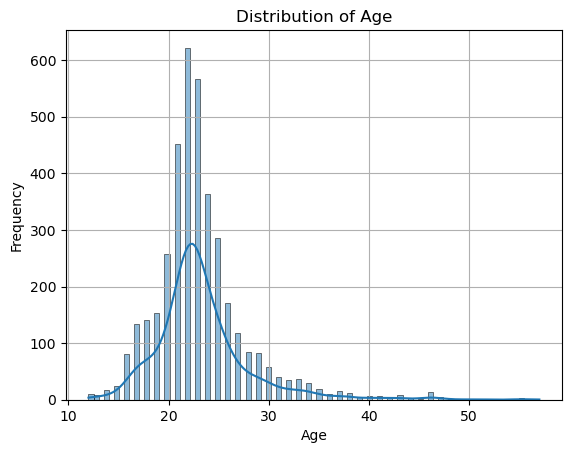

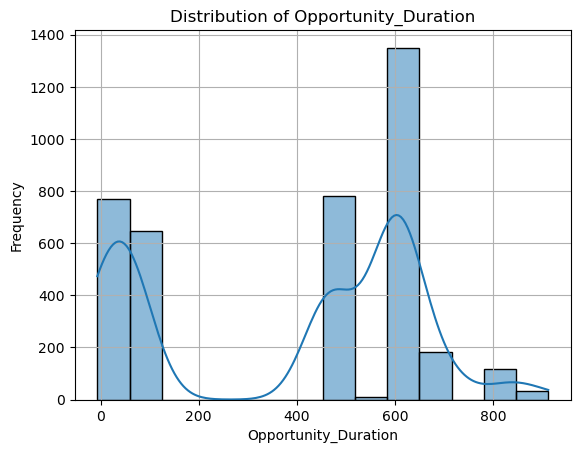

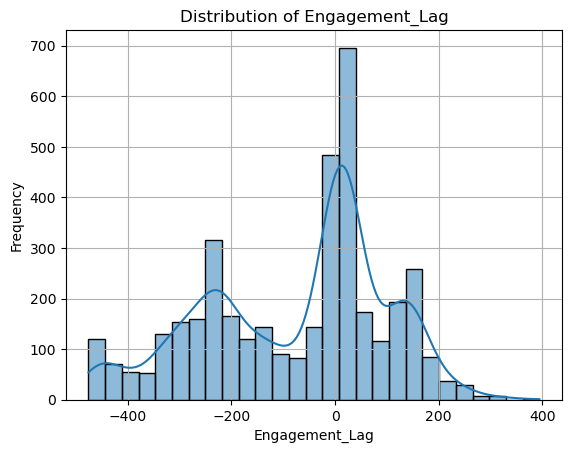

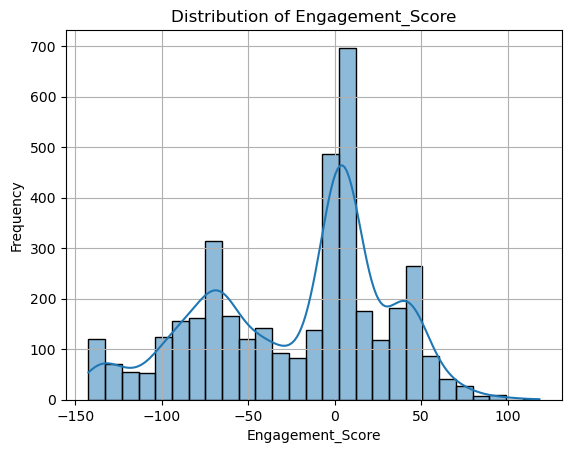

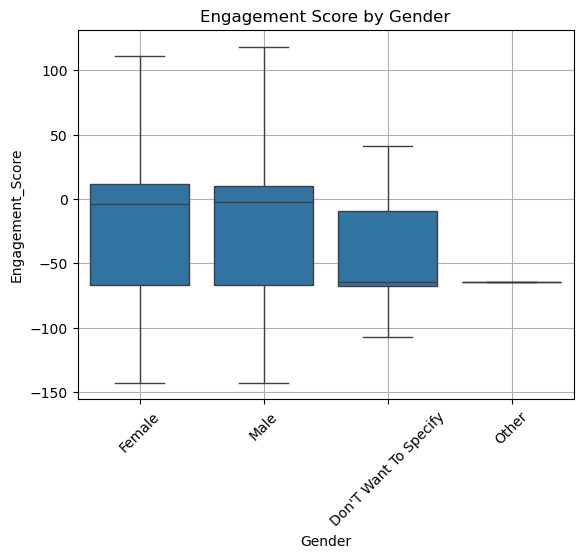

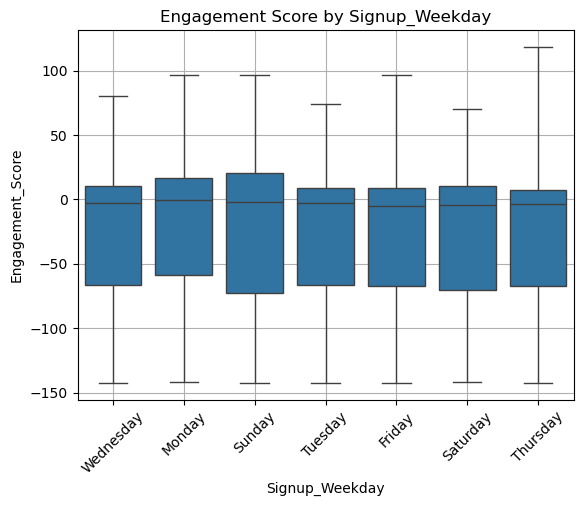

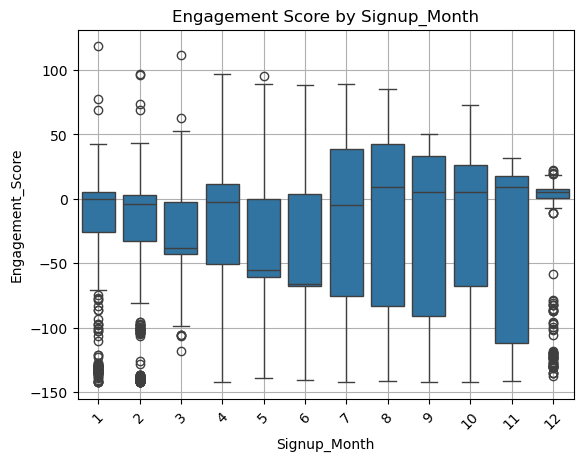

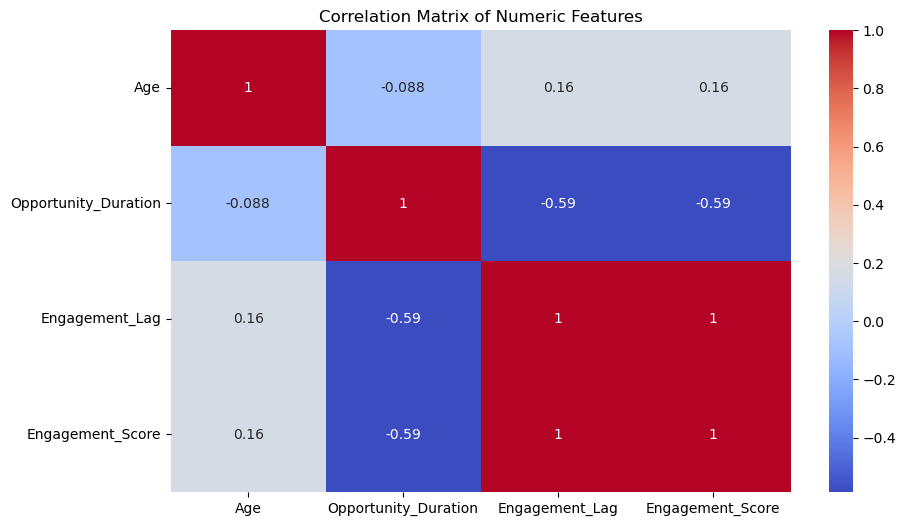

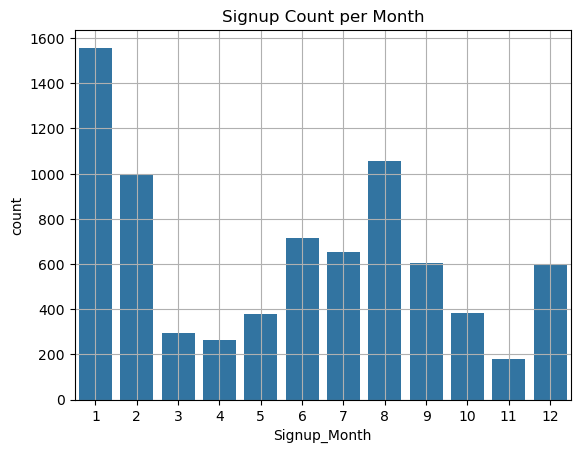

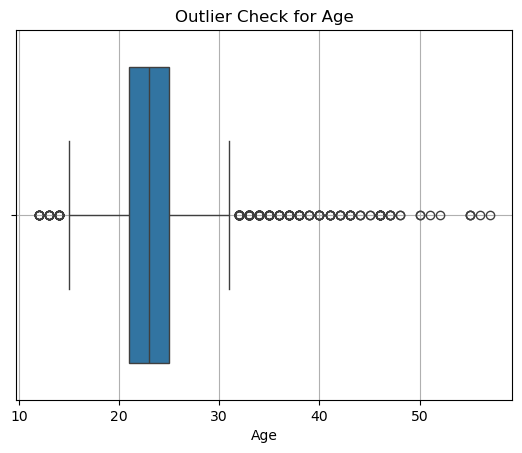

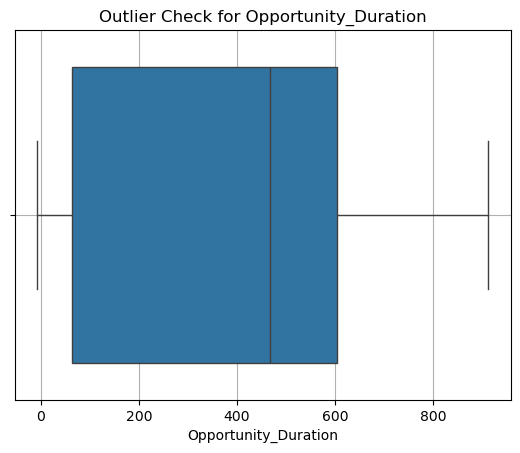

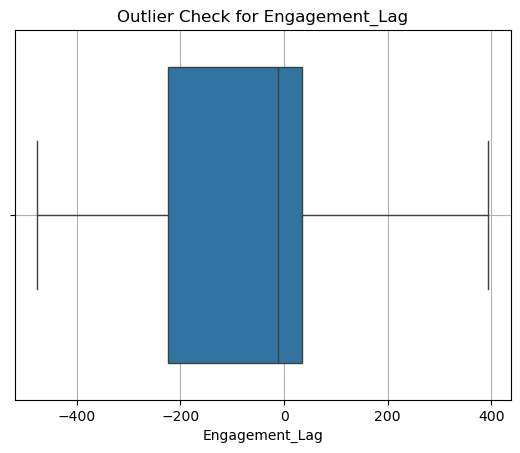

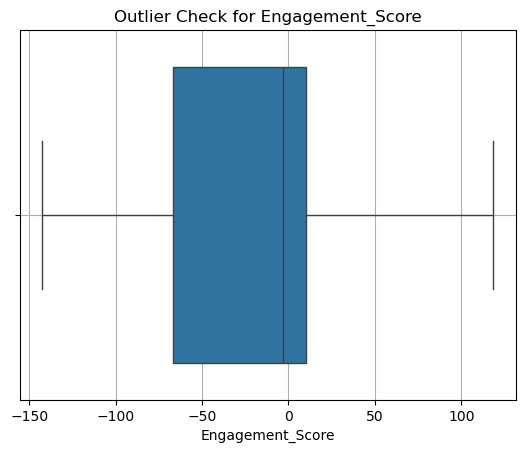

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Load cleaned dataset from Week 1
df = pd.read_csv(r"C:\Users\kasub\Desktop\Excelerate\Week1_Cleaned_dataset.csv")

# === Basic Missing Value Overview ===
print("\nMissing Values by Column:\n", df.isnull().sum())

# === Distribution Plots ===
numeric_cols = ["Age", "Opportunity_Duration", "Engagement_Lag", "Engagement_Score"]
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# === Category-wise Averages ===
categories = ["Gender", "Signup_Weekday", "Signup_Month"]
for cat in categories:
    plt.figure()
    sns.boxplot(x=cat, y="Engagement_Score", data=df)
    plt.title(f"Engagement Score by {cat}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# === Correlation Heatmap ===
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# === Signup Trend ===
plt.figure()
sns.countplot(x="Signup_Month", data=df)
plt.title("Signup Count per Month")
plt.grid(True)
plt.show()

# === Outlier Boxplots ===
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check for {col}")
    plt.grid(True)
    plt.show()

C:\Users\kasub\AppData\Local\Temp\ipykernel_15376\3815054352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


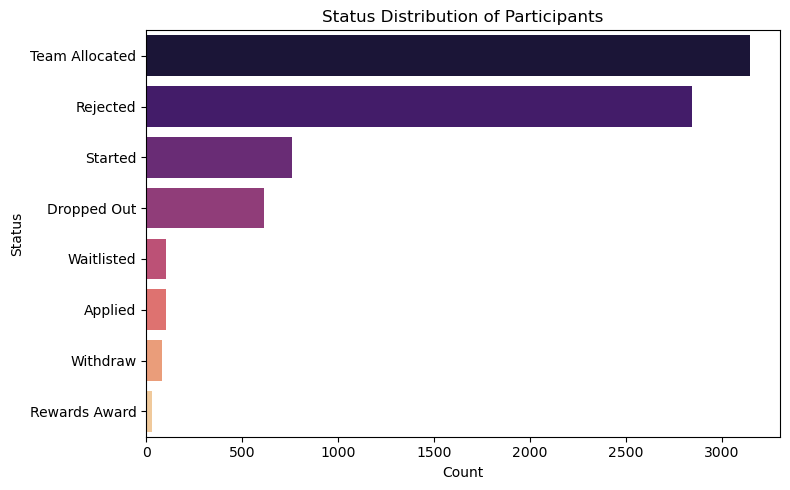

In [196]:
plt.figure(figsize=(8, 5))
status_counts = df['Status Description'].value_counts()
sns.barplot(
    x=status_counts.values,
    y=status_counts.index,
    palette='magma'
)
plt.title('Status Distribution of Participants')
plt.xlabel('Count')
plt.ylabel('Status')
plt.tight_layout()
plt.show()


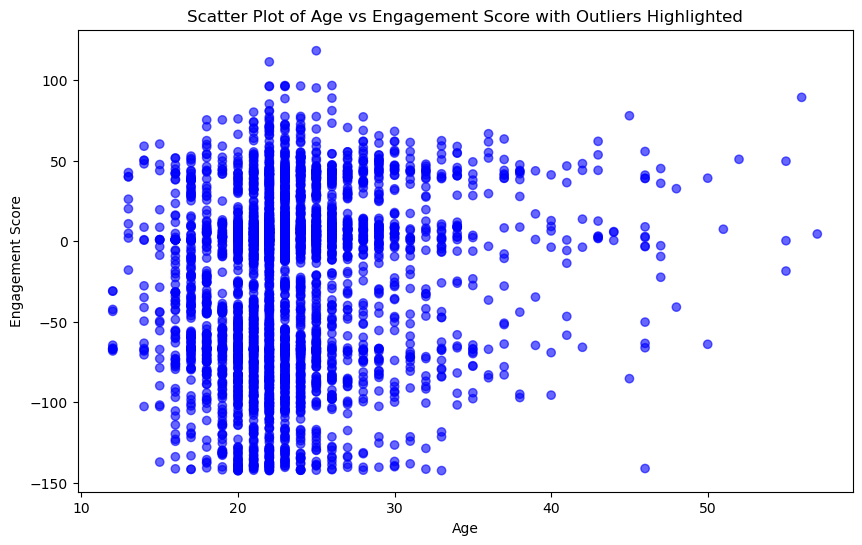

In [200]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Z-scores
df['Age_z'] = zscore(df['Age'])
df['Engagement_Score_z'] = zscore(df['Engagement_Score'])

# Outlier condition
outliers = (np.abs(df['Age_z']) > 3) | (np.abs(df['Engagement_Score_z']) > 3)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Engagement_Score'], c=outliers.map({True: 'red', False: 'blue'}), alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.title('Scatter Plot of Age vs Engagement Score with Outliers Highlighted')
plt.show()


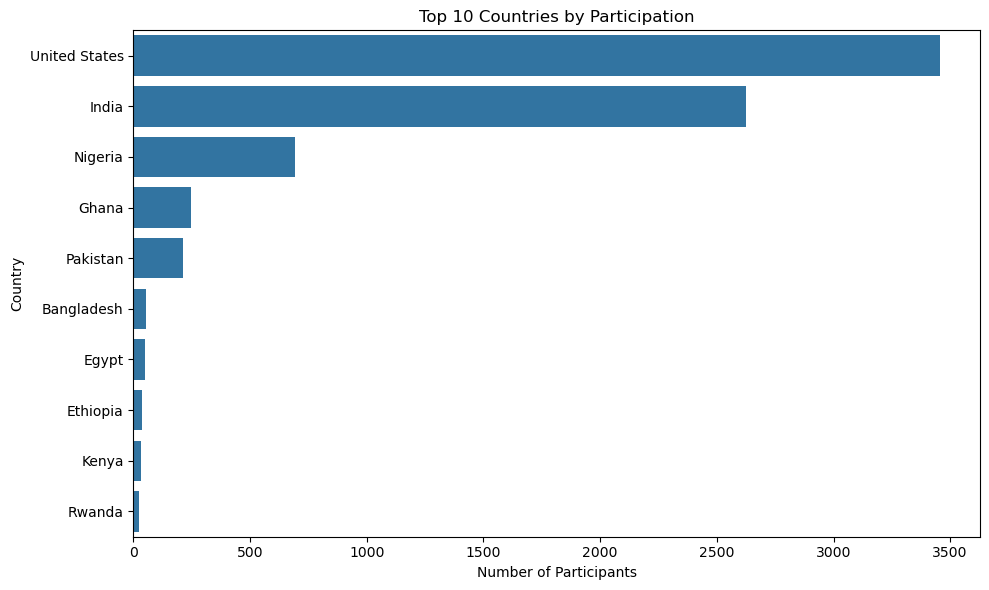

In [206]:
# Count top 10 countries directly from the 'Country' column
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Participation')
plt.xlabel('Number of Participants')
plt.ylabel('Country')
plt.tight_layout()
plt.show()